# Import packages


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# Import dataset


In [41]:
file = 'c:\\data\\train_titanic.csv'
training_set = pd.read_csv(file)

In [42]:
training_set.head()
training_set.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Explore Dataset

In [43]:
survived = training_set[training_set.Survived==1]
no_survived = training_set[training_set.Survived==0]
total = len(training_set)
survived_cnt = len(survived)
no_survived_cnt = len(no_survived)

In [44]:
print('total = ',total)
print('Number of Passengers who Survived = ',survived_cnt)
print('Number of Passengers who did not survive = ',no_survived_cnt)
print('% of Passengers who Survived = ', 1.*survived_cnt/total*100)
print('% of Passengers who did not Survive = ', 1.*no_survived_cnt/total*100)

total =  891
Number of Passengers who Survived =  342
Number of Passengers who did not survive =  549
% of Passengers who Survived =  38.38383838383838
% of Passengers who did not Survive =  61.61616161616161


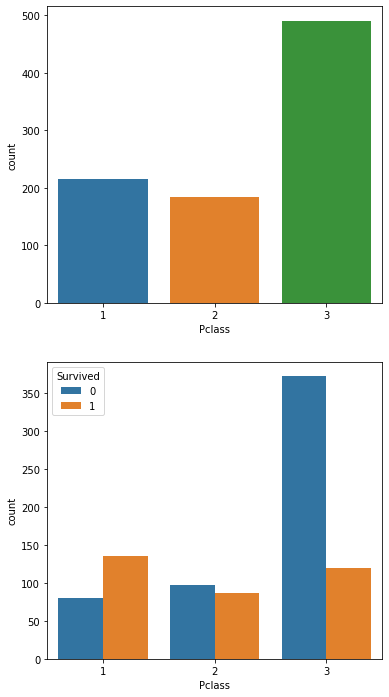

In [45]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x='Pclass', data=training_set)
plt.subplot(212)
sns.countplot(x='Pclass',hue='Survived',data=training_set)

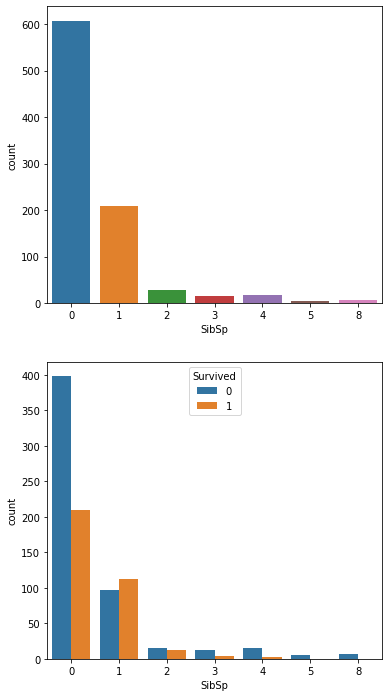

In [46]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x='SibSp', data=training_set)
plt.subplot(212)
sns.countplot(x='SibSp',hue='Survived',data=training_set)

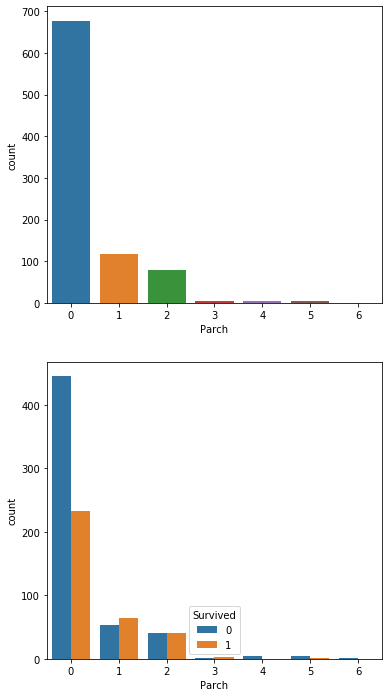

In [47]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x='Parch', data=training_set)
plt.subplot(212)
sns.countplot(x='Parch',hue='Survived',data=training_set)

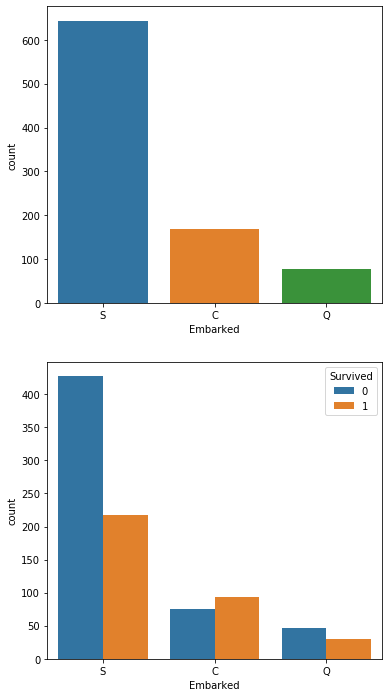

In [48]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x='Embarked', data=training_set)
plt.subplot(212)
sns.countplot(x='Embarked',hue='Survived',data=training_set)

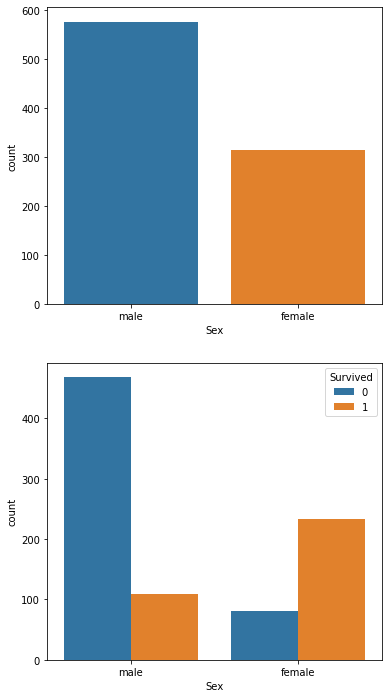

In [49]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x='Sex', data=training_set)
plt.subplot(212)
sns.countplot(x='Sex',hue='Survived',data=training_set)

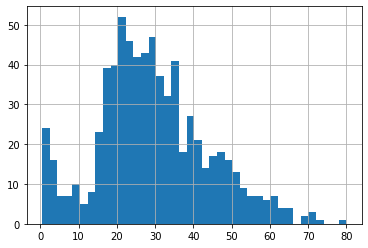

In [50]:
training_set.Age.hist(bins=40)

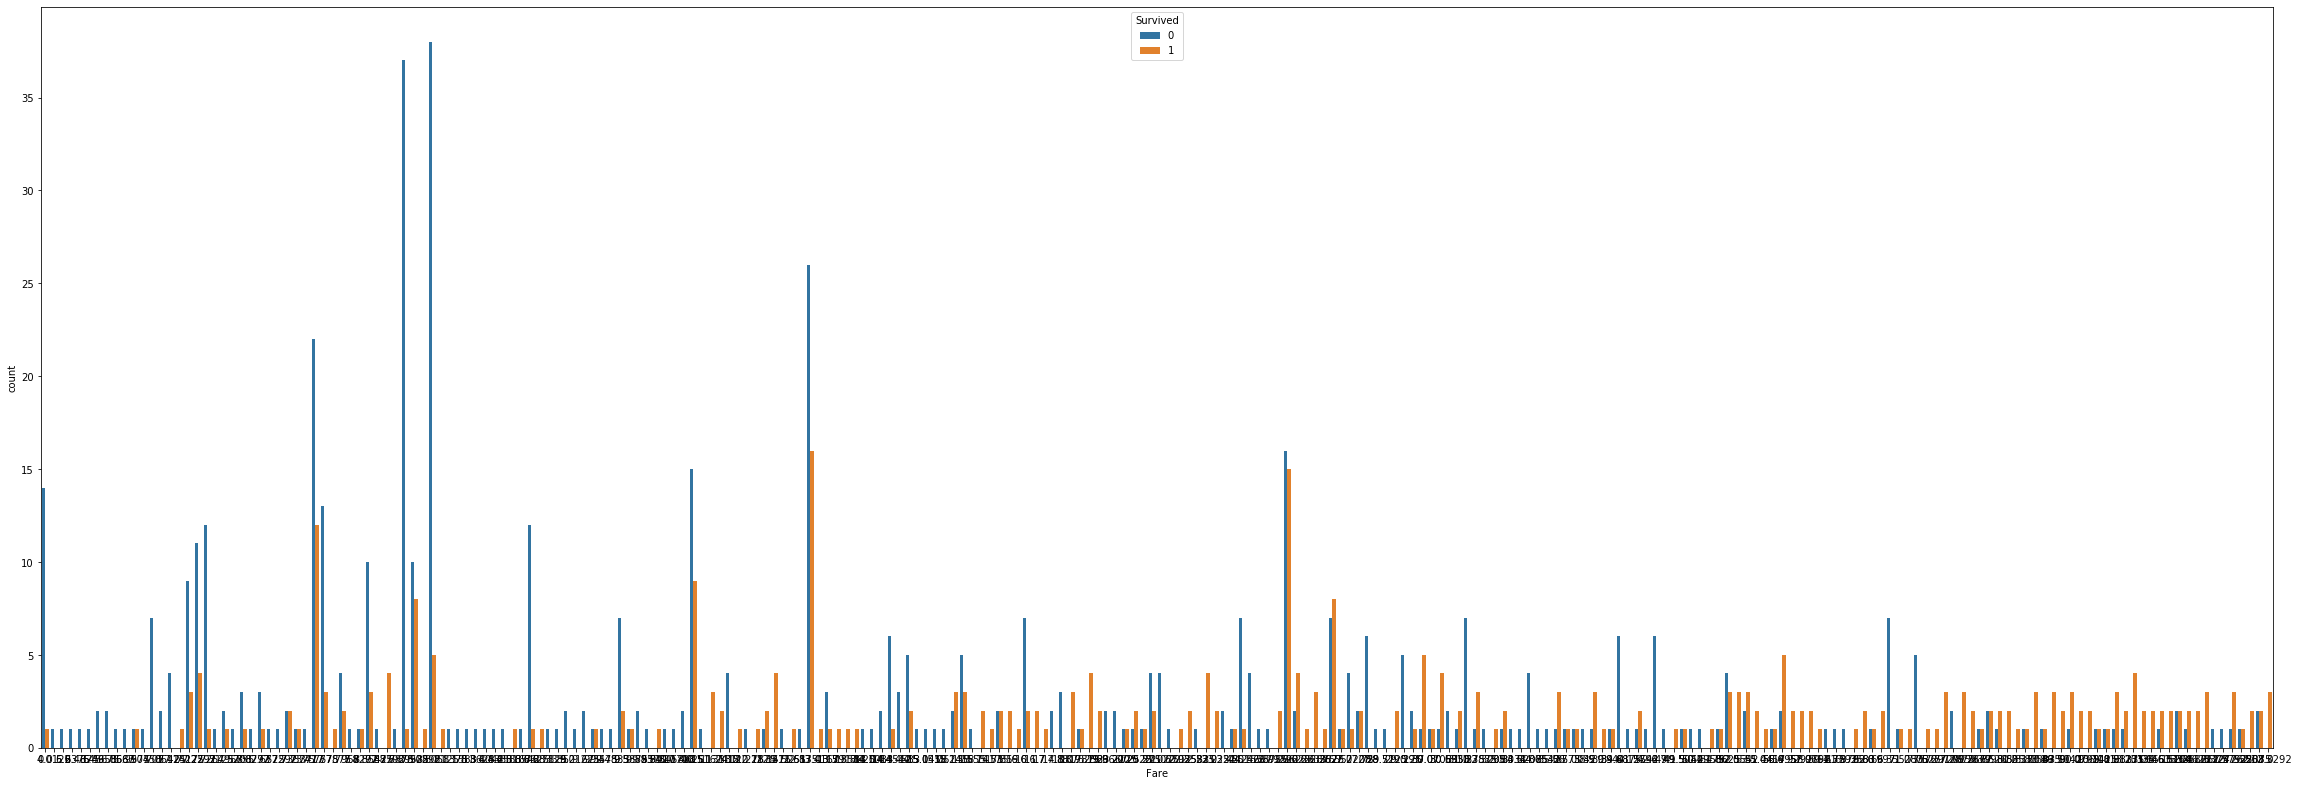

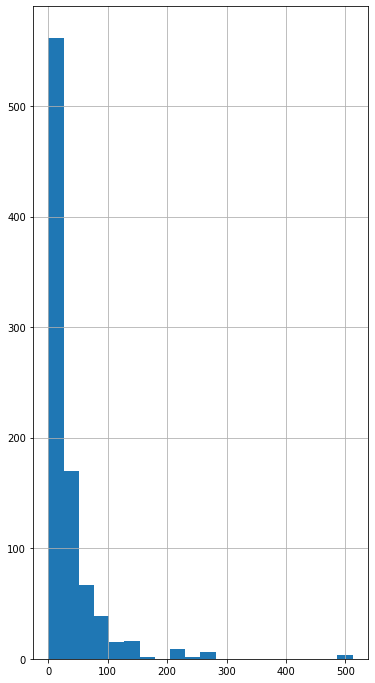

In [51]:
plt.figure(figsize=[40,30])
plt.subplot(211)
sns.countplot(x='Fare',hue='Survived',data=training_set)
plt.figure(figsize=[6,12])
training_set.Fare.hist(bins=20)

# Prepare Data

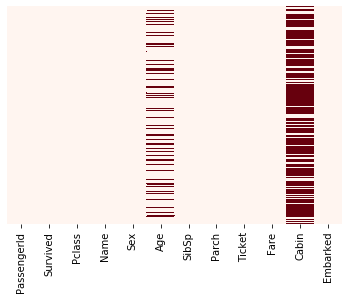

In [52]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='Reds')

In [53]:
training_set.drop('Cabin', axis=1, inplace=True)

In [54]:
training_set.drop(['Name','Embarked','PassengerId','Ticket'],axis=1,inplace=True)

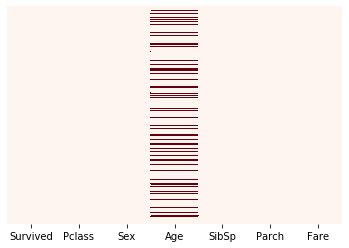

In [55]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='Reds')

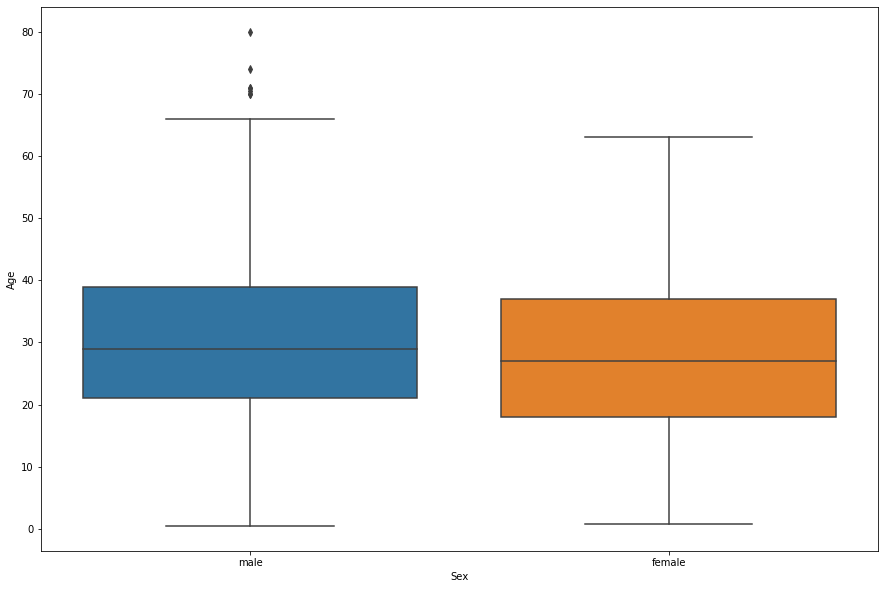

In [56]:
plt.figure(figsize=[15,10])
sns.boxplot(x='Sex',y='Age',data=training_set)

In [57]:
def Fill_Age(data):
    age=data[0]
    sex=data[1]
    
    if pd.isnull(age):
        if sex is 'male':
            return 29
        else:
            return 25
    else:
        return age

In [58]:
training_set.Age = training_set[['Age','Sex']].apply(Fill_Age, axis=1)

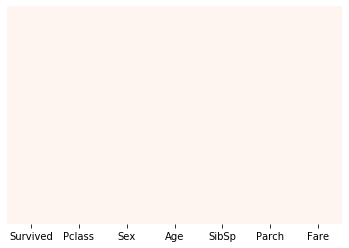

In [59]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='Reds')

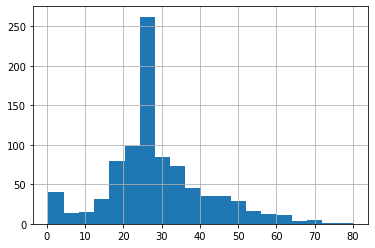

In [60]:
training_set.Age.hist(bins=20)

In [61]:
pd.get_dummies(training_set.Sex)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [62]:
male = pd.get_dummies(training_set.Sex, drop_first=True)
training_set.drop(['Sex'],axis=1,inplace=True)
training_set['Sex '] = male

In [63]:
x=training_set.drop('Survived',axis=1).values

x

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ,  1.    ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    , 25.    ,  1.    ,  2.    , 23.45  ,  0.    ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ,  1.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ,  1.    ]])

In [64]:
x = training_set['Survived'].value

In [65]:
y = pclass.values()

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

# Step 4 Model Training 

In [66]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [67]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Step 5 Model Testing

In [68]:
y_predict = classifier.predict(x_test)

In [69]:
y_predict

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

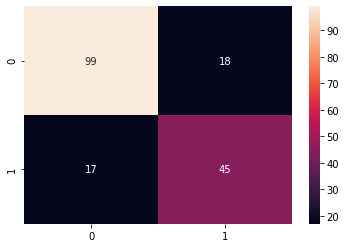

In [70]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True,fmt='d')

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.71      0.73      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.81      0.80      0.80       179

